In [314]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd

Cómo puedo hacer para encontrar la vecindad de un punto en una matriz?

La manera obvia sería iterar.

El problema con iterar es que hay que definir muchos casos límite: cuando el punto se encuentra en alguna esquina o en algún lado.

Tiene que haber alguna funcionalidad tipo convolución que me permita resolver esto.

In [267]:
def moore_neighborhood_idxs(lattice, point, r=1):

    x, y = point
    x_max, y_max = lattice.shape


    x_range = np.arange(max(0, x-r), min(x_max, x+r+1))
    y_range = np.arange(max(0, y-r), min(y_max, y+r+1))

    neighbor_idxs = [neighbor_point for neighbor_point in product(x_range, y_range) 
                    if neighbor_point != point]

    return neighbor_idxs


def moore_neighborhood(lattice, point, r=1):
    
    neighbor_idxs = moore_neighborhood_idxs(lattice, point, r)
    return [lattice[idx] for idx in neighbor_idxs]


def get_data(lattice, point):
    x, y = point
    return lattice[:, x, y]

In [346]:
F = 5
q = 10
rounds = 1000000
lattice = np.random.randint(low=0, high=q-1, size=(F, 10, 10))

In [347]:
logs = []

for sim_round in tqdm(range(rounds)):

    log = [sim_round, 0]
    point = np.random.randint(low=0, high=q-1, size=2)

    neighbors = moore_neighborhood_idxs(lattice[0], tuple(point))
    random_neighbor = neighbors[np.random.choice(len(neighbors))]

    data_point = get_data(lattice, tuple(point))
    data_neighbor = get_data(lattice, random_neighbor)

    coincidences = data_point == data_neighbor
    interaction_proba = sum(coincidences) / F

    if interaction_proba < 1.0:
        do_interact = np.random.choice(a=[True, False], 
                                    p=[interaction_proba, 1-interaction_proba])

        if do_interact:
            random_trait_idx = np.random.choice([idx for idx, coincidence 
                                                in enumerate(coincidences) 
                                                if not coincidence])
            lattice[random_trait_idx, point[0], point[1]] = data_neighbor[random_trait_idx]
            log[1] = 1


    logs.append(log)


  0%|          | 0/1000000 [00:00<?, ?it/s]

100%|██████████| 1000000/1000000 [02:50<00:00, 5851.46it/s]


<Axes: >

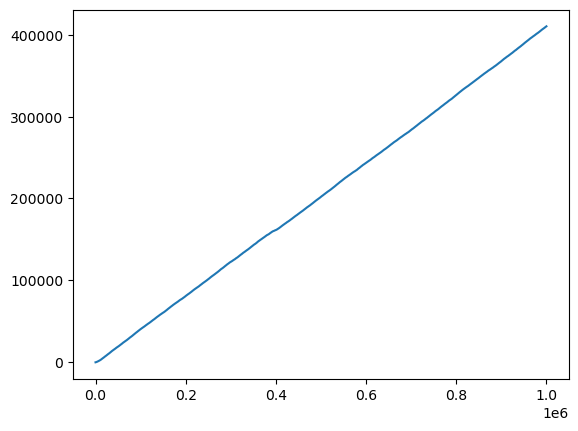

In [348]:
df_logs = pd.DataFrame(logs, columns=['round', 'interaction'])
df_logs.interaction.cumsum().plot()

In [357]:
list(zip([1,1], [1,1], [1,1]))

[(1, 1, 1), (1, 1, 1)]

In [361]:
len(list(zip([lattice[idx, :, :] for idx in range(lattice.shape[0])])))

5

In [420]:
res = []

for i in range(lattice.shape[1]):
    for j in range(lattice.shape[2]):
        res.append(lattice[:, i, j])

res = np.array(res)

In [440]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [441]:
scaler = StandardScaler()
pca = PCA(n_components=2, random_state=42)

In [442]:
X = scaler.fit_transform(res)
X = pca.fit_transform(X)

In [426]:
import plotly.graph_objects as go

In [443]:
data = go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', hovertext=list(map(lambda x: "-".join([str(y) for y in x]), res)))
fig = go.Figure(data=data)
fig.show()